In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=3)
%matplotlib inline

# Cruzamentos dos dados entre EJ, Mautic e Analytics.

## Relatório 1

In [200]:
# EJ(votos) + Mautic(contatos) + Dados gerais de Analytics
df2 = pd.read_csv('/tmp/airflow/ej_analytics_mautic.csv',dtype={'analytics_client_id': str})

### Número de votos por canal (mtc_source)

Media de votos geral :1157


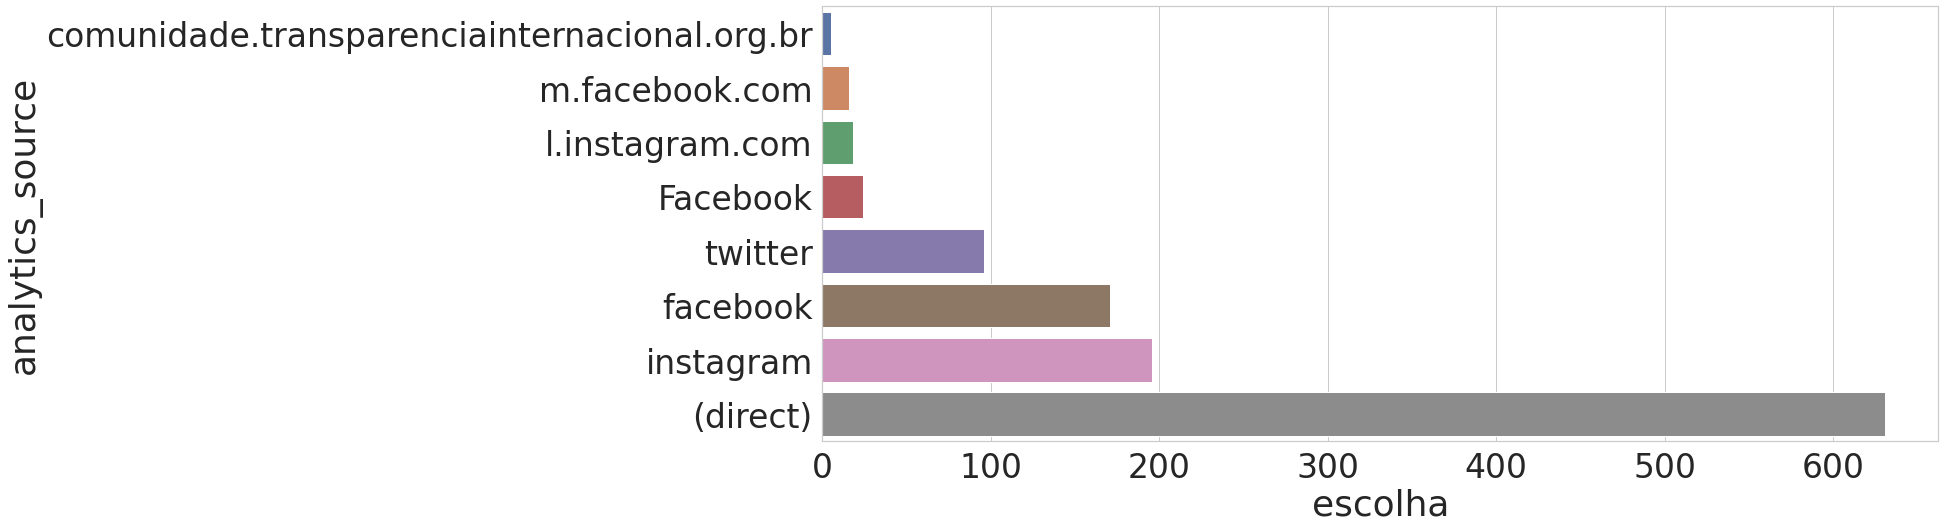

In [201]:
votes_by_channel_df = df2.groupby('analytics_source').count()
votes_by_channel_df.reset_index(inplace=True)
plt.figure(figsize=(20,8))
votes_by_channel_df.sort_values(by='escolha', inplace=True)
sns.set_style('whitegrid')
plot = sns.barplot(y='analytics_source', x='escolha', data=votes_by_channel_df)
print(f"Media de votos geral :{votes_by_channel_df['escolha'].sum()}")

### Número de usuários únicos por canal (mtc_source)

Usuários únicos por canal com pelo menos um voto:71


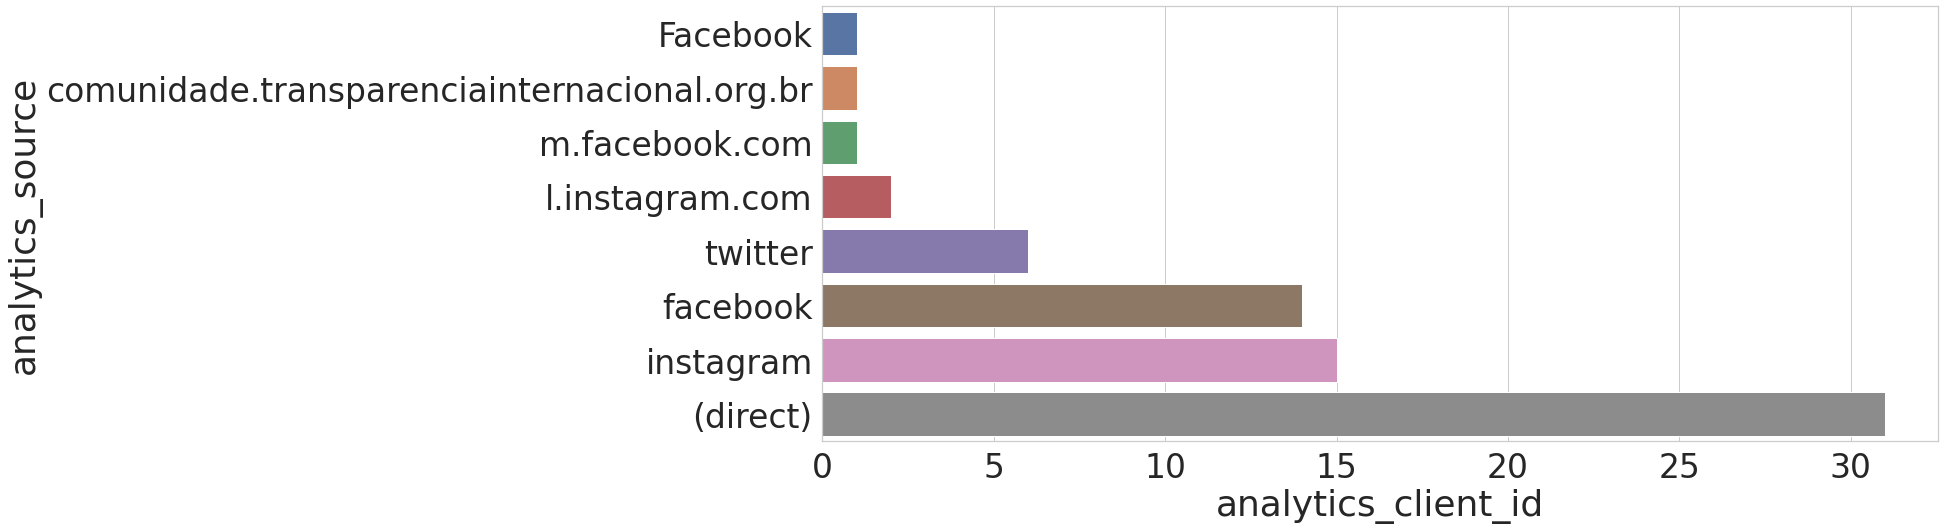

In [202]:
uniq_users_by_source_df = df2.groupby('analytics_source').nunique()
uniq_users_by_source_df.drop('analytics_source', axis=1, inplace=True)
uniq_users_by_source_df.reset_index(inplace=True)
plt.figure(figsize=(20,8))
uniq_users_by_source_df.sort_values(by='analytics_client_id', inplace=True)
sns.set_style('whitegrid')
sns.barplot(y='analytics_source', x='analytics_client_id', data=uniq_users_by_source_df)
print(f"Usuários únicos por canal com pelo menos um voto:{uniq_users_by_source_df['analytics_client_id'].sum()}")

### TOP 10 usuários votantes

In [203]:
## HEADER
tmp = df2.groupby(['analytics_client_id', 'mautic_email']).count().reset_index(level=0).reset_index(level=0)
most_participation_users = pd.DataFrame(tmp, columns=['analytics_client_id', 'criado', 'mautic_email']) 
most_participation_users.rename(columns={'criado': 'votos'}, inplace=True)
most_participation_users.head(10)

,analytics_client_id,votos,mautic_email
0,1667238980.1581114839,24,siul.prado.lcdp@gmail.com
1,1687884283.1544397112,16,fe.mazziotti@uol.com.br
2,1774784749.1588139456,8,miguelconsultoria@yahoo.com.br
3,1780264117.1588287269,24,olinthordsouza@uol.com.br
4,1935361641.1588287568,5,fernanda123ja@gmail.com
5,1952709213.1586711979,24,aymonecosta@yahoo.com.br
6,397769184.1587727960,24,lais.dutravargas@yahoo.com.br
7,446669856.1588123278,9,taciano_mm@yahoo.com.br
8,593129003.1588287464,24,paulocesarsiqueira@yahoo.com.br
9,707828180.1588364694,31,vanderlei_oliveiradossantos@yahoo.com.br
